# ECS 308: Data Science and Machine Learning

# Project 7

# Identify the Quality of Mushrooms Using Machine Learning

By

Sushovit Nanda (21283)

Instructor

Dr. Tanmay Basu

Assistant Professor, IISER Bhopal

# Importing the Libraries and the Data

In [1]:
import numpy as np
import pandas as pd
import warnings
mushroom_train_data = pd.read_csv("mushroom_trn_data.csv")
mushroom_train_label = pd.read_csv("mushroom_trn_class_labels.csv", names = ["row", "class"])
mushroom_train_label = mushroom_train_label.drop('row', axis = 1)
true_test = pd.read_csv("mushroom_tst_data.csv")
warnings.filterwarnings("ignore")

# Data Visualization

In [2]:
print("shape of the train data is ",mushroom_train_data.shape)
print("Description of Train Data\n")
mushroom_train_data.describe()

shape of the train data is  (7311, 22)
Description of Train Data



,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,7311,7311,7311,7311,7311,7311,7311,7311,7311,7311,...,7311,7311,7311,7311,7311,7311,7311,7311,7311,7311
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3287,2899,2039,4268,3177,7129,6124,5056,1557,4156,...,4430,4024,3968,7311,7139,6730,3563,2157,3639,2839


In [3]:
print('shape of the test data is',true_test.shape)
print("\n")
true_test.describe()

shape of the test data is (813, 22)




,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,813,813,813,813,813,813,813,813,813,813,...,813,813,813,813,813,813,813,813,813,813
unique,5,3,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,369,345,245,480,351,785,688,556,171,452,...,506,440,416,813,785,758,405,231,401,309


In [4]:
print('details of the class labels')
print(mushroom_train_label)
print("\n")
print(mushroom_train_label.value_counts())

details of the class labels
     class
0        e
1        e
2        e
3        p
4        p
...    ...
7306     e
7307     e
7308     e
7309     e
7310     e

[7311 rows x 1 columns]


class
e        3787
p        3524
dtype: int64


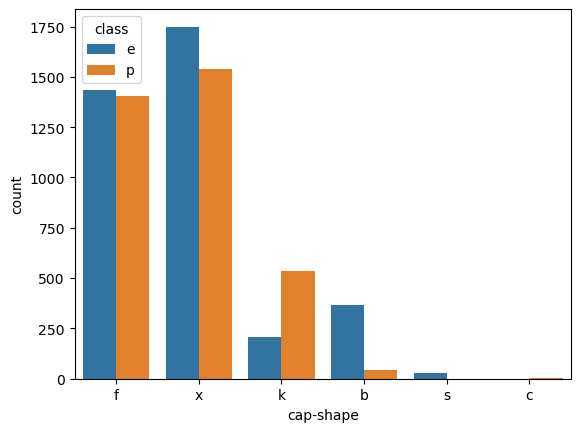

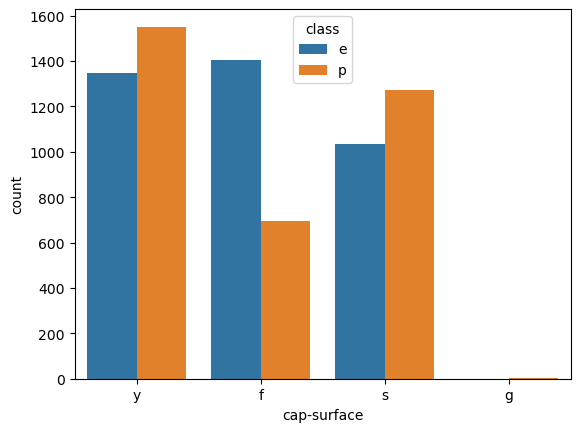

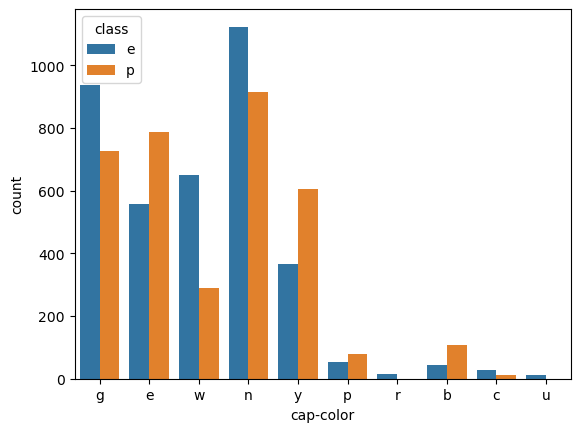

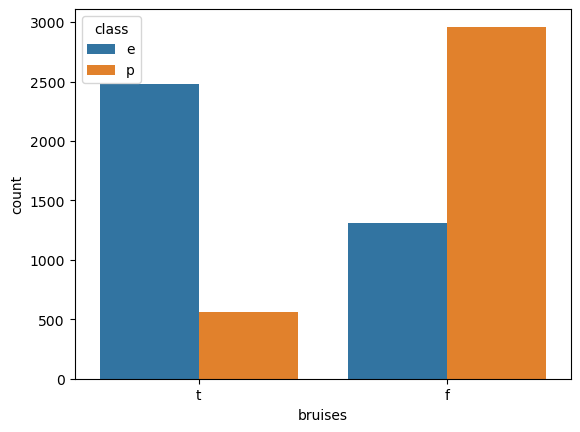

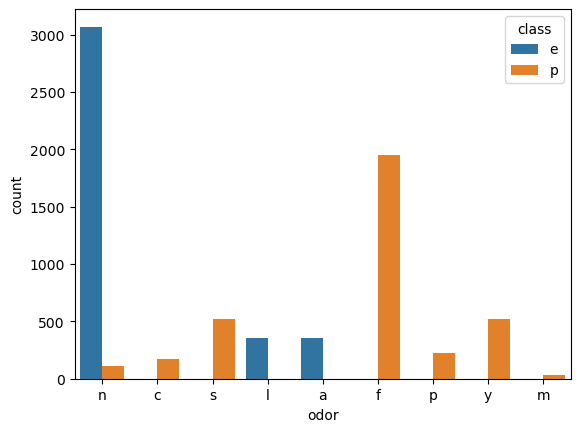

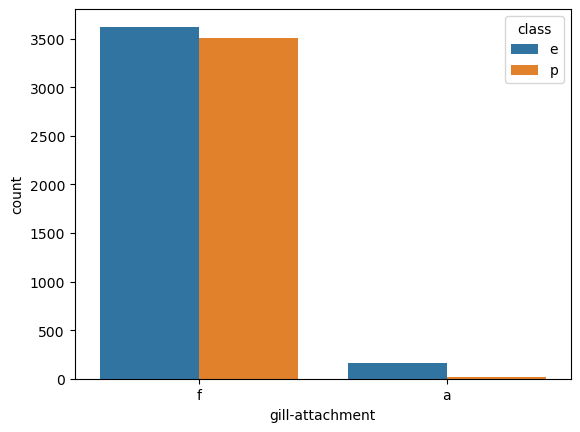

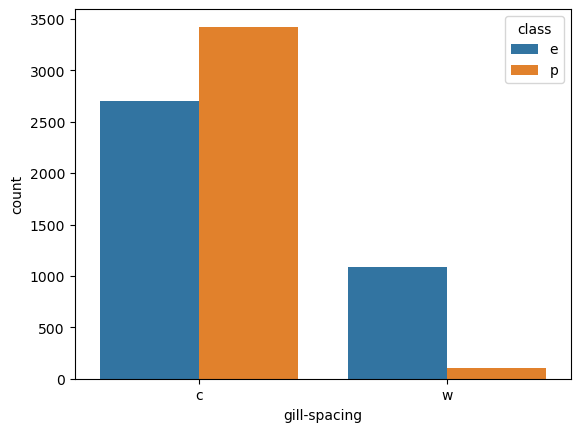

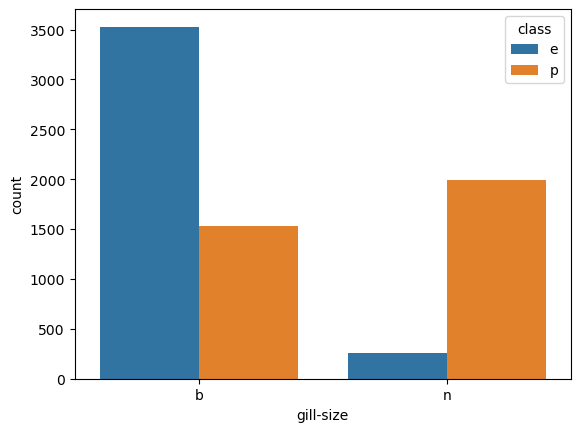

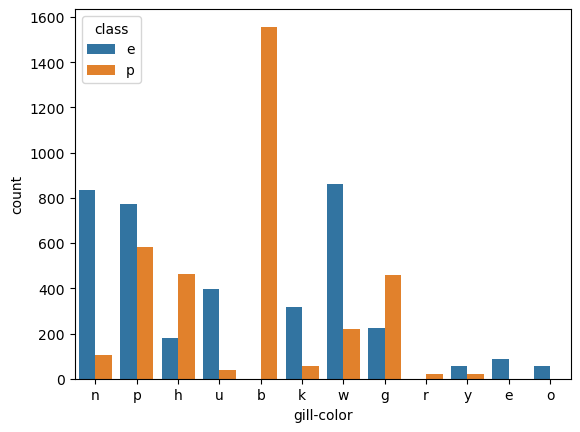

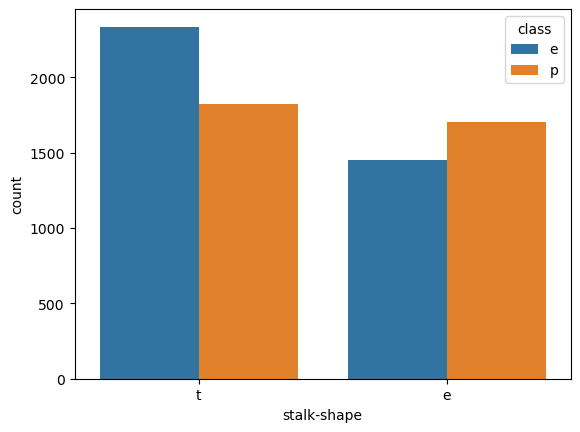

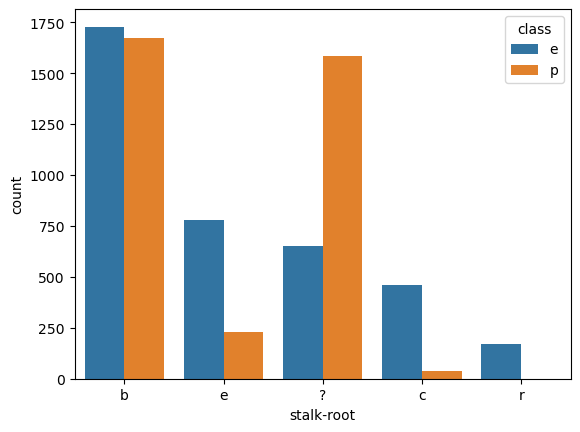

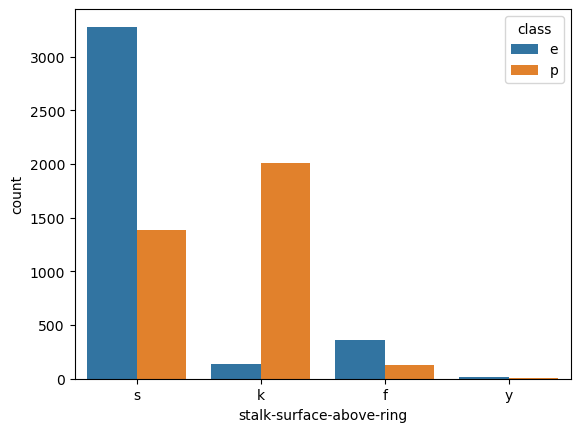

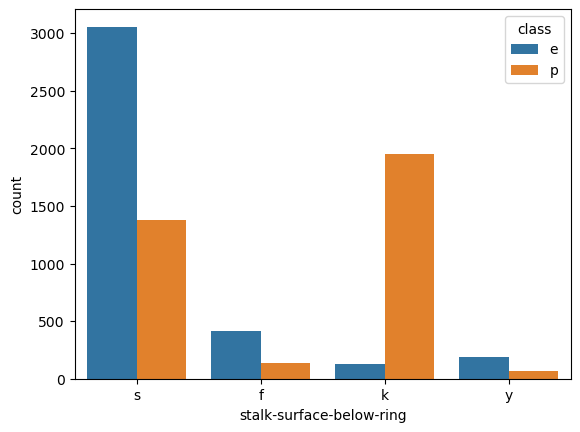

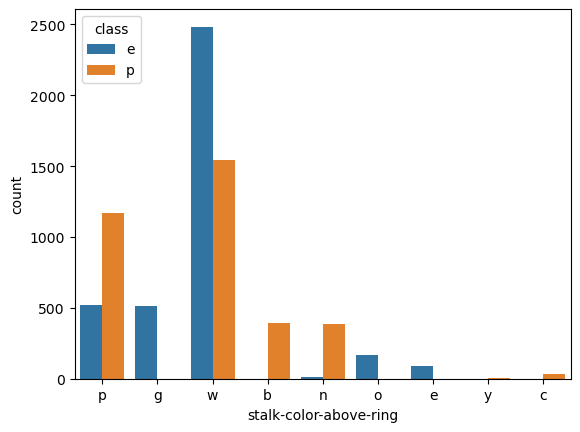

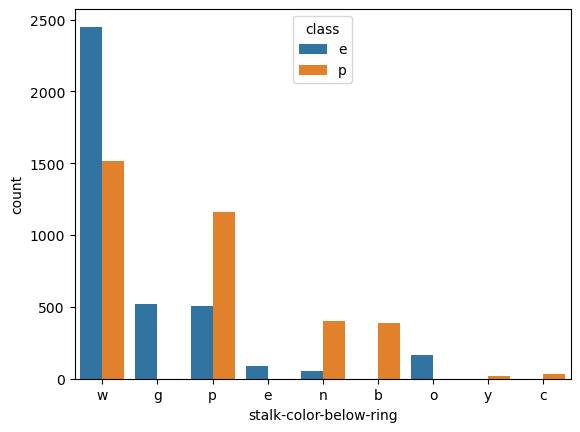

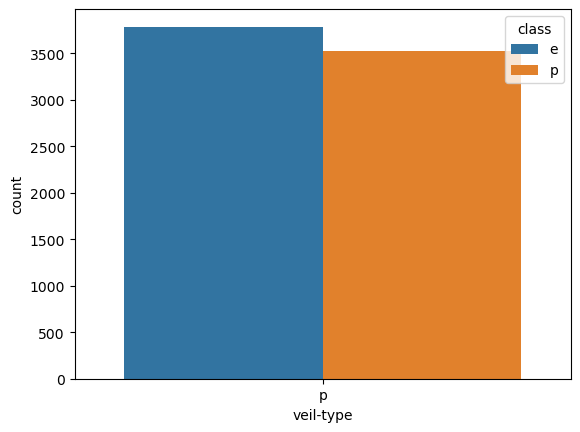

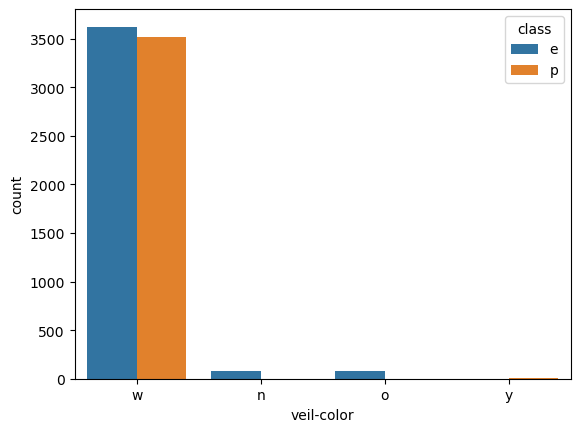

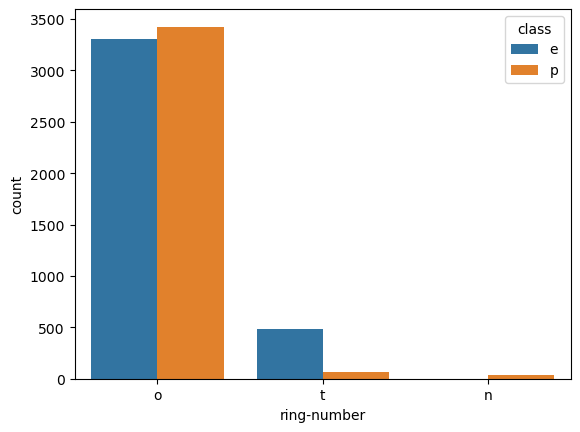

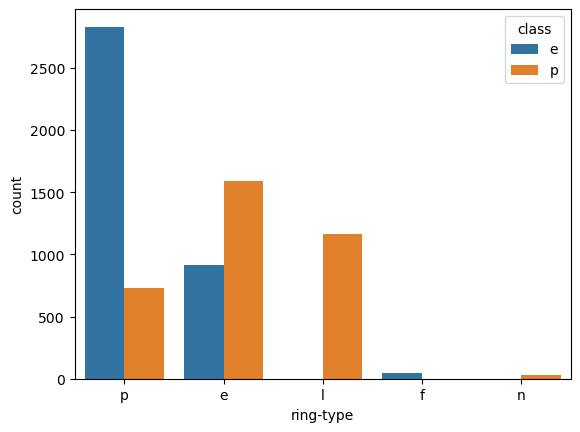

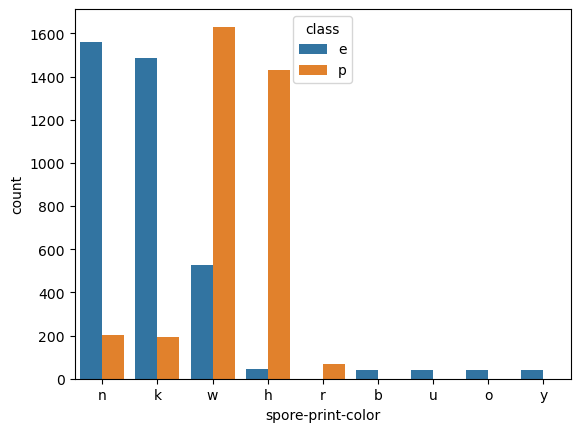

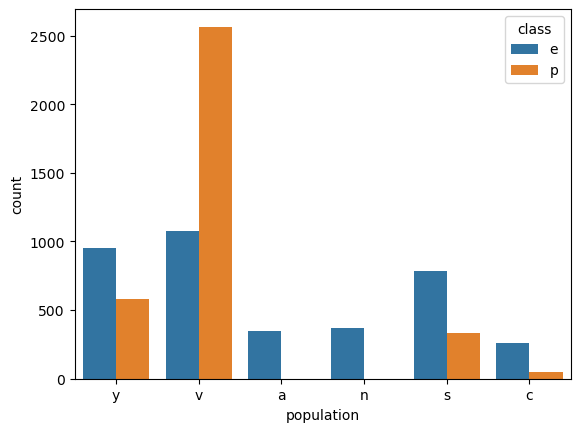

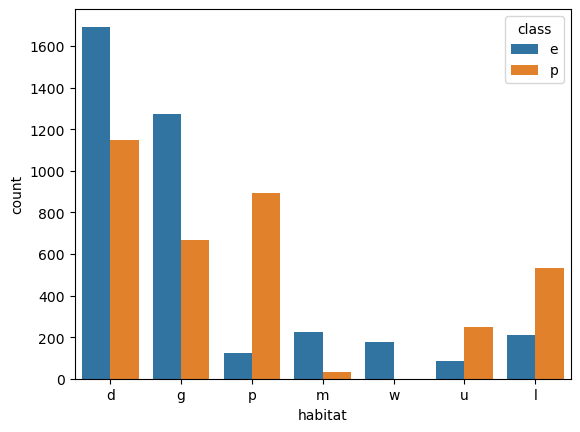

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in mushroom_train_data.columns:
    sns.countplot(data = mushroom_train_data, x = i, hue = mushroom_train_label['class'])
    plt.show()

# Removing Feature Classes with missing values and only 1 unique value

In [6]:
print("Total unique features in stall-root feature class is ",mushroom_train_data['stalk-root'].unique())
print("and the count of each feature is\n ", mushroom_train_data['stalk-root'].value_counts())
true_test['stalk-root'].value_counts()

Total unique features in stall-root feature class is  ['b' 'e' '?' 'c' 'r']
and the count of each feature is
  b    3401
?    2235
e    1005
c     498
r     172
Name: stalk-root, dtype: int64


b    375
?    245
e    115
c     58
r     20
Name: stalk-root, dtype: int64

In [7]:
mushroom_train_data = mushroom_train_data.drop(['veil-type','stalk-root'], axis = 1)
true_test = true_test.drop(['veil-type','stalk-root'], axis = 1)

# Data Pre-Processing

In [8]:
merged_dataset = pd.concat([mushroom_train_data, true_test], axis = 0)
print(merged_dataset.describe().T)

                         count unique top  freq
cap-shape                 8124      6   x  3656
cap-surface               8124      4   y  3244
cap-color                 8124     10   n  2284
bruises                   8124      2   f  4748
odor                      8124      9   n  3528
gill-attachment           8124      2   f  7914
gill-spacing              8124      2   c  6812
gill-size                 8124      2   b  5612
gill-color                8124     12   b  1728
stalk-shape               8124      2   t  4608
stalk-surface-above-ring  8124      4   s  5176
stalk-surface-below-ring  8124      4   s  4936
stalk-color-above-ring    8124      9   w  4464
stalk-color-below-ring    8124      9   w  4384
veil-color                8124      4   w  7924
ring-number               8124      3   o  7488
ring-type                 8124      5   p  3968
spore-print-color         8124      9   w  2388
population                8124      6   v  4040
habitat                   8124      7   

In [9]:
merged_dataset.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
merged_dataset = pd.get_dummies(merged_dataset)
merged_dataset

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
809,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
810,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
811,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [11]:
mushroom_train_data = merged_dataset.iloc[:7311]     #splicing back to original training data
true_test = merged_dataset.iloc[7311:]               #splicing back to original testing data
mushroom_train_label = mushroom_train_label.replace({"p" : 0, "e" : 1})

# Feature Selection 

In [12]:
mushroom_train_data.corr()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
cap-shape_b,1.000000,-0.005696,-0.194013,-0.081814,-0.015362,-0.220011,-0.090262,0.019757,0.108950,-0.020902,...,0.166123,-0.169721,-0.121002,-0.184187,0.148817,0.010821,0.379805,-0.094527,-0.053094,-0.038344
cap-shape_c,-0.005696,1.000000,-0.018647,-0.007863,-0.001477,-0.021146,-0.014868,0.249589,-0.015876,0.016906,...,-0.009941,-0.023292,-0.012052,-0.018642,-0.014067,0.069616,-0.004502,-0.009416,-0.005103,-0.003685
cap-shape_f,-0.194013,-0.018647,1.000000,-0.267861,-0.050296,-0.720324,0.063283,-0.006646,-0.091439,0.028608,...,-0.075863,0.040080,0.107885,0.080138,-0.020331,-0.050401,-0.127637,0.018769,0.025654,-0.019640
cap-shape_k,-0.081814,-0.007863,-0.267861,1.000000,-0.021209,-0.303755,-0.158534,0.011506,0.137518,0.015535,...,-0.086166,0.168204,-0.168664,-0.089343,-0.108719,0.226031,-0.064666,0.090998,-0.073304,0.123878
cap-shape_s,-0.015362,-0.001477,-0.050296,-0.021209,1.000000,-0.057035,0.099309,-0.001477,-0.042822,-0.051154,...,-0.026813,-0.001891,0.047678,-0.050281,-0.037940,-0.021209,-0.012142,-0.025396,0.289335,-0.009940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_l,0.010821,0.069616,-0.050401,0.226031,-0.021209,-0.093421,-0.190554,0.069616,0.183336,-0.001132,...,-0.142798,0.248829,-0.173115,-0.267784,-0.202059,1.000000,-0.064666,-0.135252,-0.073304,-0.052939
habitat_m,0.379805,-0.004502,-0.127637,-0.064666,-0.012142,-0.009402,-0.122267,-0.004502,0.069356,0.047481,...,0.149705,-0.141413,-0.099108,-0.153305,-0.115678,-0.064666,1.000000,-0.077432,-0.041966,-0.030307
habitat_p,-0.094527,-0.009416,0.018769,0.090998,-0.025396,-0.026309,-0.088217,-0.009416,-0.034228,0.114593,...,-0.122706,0.170453,0.037187,-0.320645,-0.241946,-0.135252,-0.077432,1.000000,-0.087774,-0.063389
habitat_u,-0.053094,-0.005103,0.025654,-0.073304,0.289335,0.007572,-0.015238,-0.005103,0.122062,-0.101592,...,0.135495,-0.000329,-0.044565,-0.173782,-0.131129,-0.073304,-0.041966,-0.087774,1.000000,-0.034355


In [13]:
def correlations(dataset, threshold):  #To find the correlated features
    corr_column = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                corr_column.add(col_name)
    return corr_column

In [14]:
corr_features = correlations(mushroom_train_data, 0.8)  #Threshold of 80% correlation 
print('Number of correlated features are',len(set(corr_features)))
print(corr_features)

Number of correlated features are 10
{'stalk-color-above-ring_c', 'ring-number_n', 'veil-color_y', 'stalk-color-below-ring_o', 'stalk-color-above-ring_o', 'spore-print-color_h', 'spore-print-color_w', 'veil-color_w', 'stalk-color-below-ring_c', 'ring-type_n'}


In [15]:
mushroom_train_data = mushroom_train_data.drop(corr_features, axis = 1)
true_test = true_test.drop(corr_features, axis = 1)

# Working on Classifier Models

In [16]:
features = mushroom_train_data
target = mushroom_train_label
x = features.values
y = target.values

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)                                                  
class_names = ['poisonous', 'edible']
print ('x_train Shape:', x_train.shape)
print ('x_test Shape:', x_test.shape)
print ('y_train Shape:', y_train.shape)
print ('y_test Shape:', y_test.shape)

x_train Shape: (5848, 101)
x_test Shape: (1463, 101)
y_train Shape: (5848, 1)
y_test Shape: (1463, 1)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 1) Logistic Regression

In [19]:
log = LogisticRegression()
gsc_log = GridSearchCV(log,{'penalty':['l1', 'l2', 'elasticnet', 'None'], 'solver':['lbfgs', 'liblinear', 'newton-cg']})
gsc_log.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']})

In [20]:
log_result = pd.DataFrame(gsc_log.cv_results_)
log_result[['mean_fit_time', 'param_penalty', 'param_solver', 'mean_test_score']]

,mean_fit_time,param_penalty,param_solver,mean_test_score
0,0.000000,l1,lbfgs,NaN
1,0.015561,l1,liblinear,0.999658
2,0.000000,l1,newton-cg,NaN
3,0.084927,l2,lbfgs,0.999658
4,0.019097,l2,liblinear,0.999658
5,0.169852,l2,newton-cg,0.999658
6,0.000000,elasticnet,lbfgs,NaN
7,0.003137,elasticnet,liblinear,NaN
8,0.000000,elasticnet,newton-cg,NaN
9,0.000000,None,lbfgs,NaN


In [21]:
print('best LOG parameters are:',gsc_log.best_params_)
print('best LOG score is',gsc_log.best_score_)

best LOG parameters are: {'penalty': 'l1', 'solver': 'liblinear'}
best LOG score is 0.9996579734304285


In [22]:
log = gsc_log.best_estimator_
log_pred = log.predict(x_test)
print("\nLogistic Regression confusion matrix: \n",confusion_matrix(y_test, log_pred))
print("\nLogistic Regression classification report: \n",classification_report(y_test,log_pred,target_names=class_names))


Logistic Regression confusion matrix: 
 [[716   0]
 [  0 747]]

Logistic Regression classification report: 
               precision    recall  f1-score   support

   poisonous       1.00      1.00      1.00       716
      edible       1.00      1.00      1.00       747

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463



# 2) Decision Tree Classifier

In [23]:
dtree = DecisionTreeClassifier()
gsc_dtree = GridSearchCV(dtree,{'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth':[2,3,4]}, cv = 10)
gsc_dtree.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4]})

In [24]:
dtree_result = pd.DataFrame(gsc_dtree.cv_results_)
dtree_result[['mean_fit_time', 'param_criterion', 'param_max_depth', 'mean_test_score']]

,mean_fit_time,param_criterion,param_max_depth,mean_test_score
0,0.008615,gini,2,0.925445
1,0.008953,gini,3,0.965800
2,0.013033,gini,4,0.999658
3,0.008726,entropy,2,0.925445
4,0.011936,entropy,3,0.965800
5,0.010319,entropy,4,0.999658
6,0.000000,log_loss,2,NaN
7,0.003365,log_loss,3,NaN
8,0.001363,log_loss,4,NaN


In [25]:
print('best DTree parameters are:',gsc_dtree.best_params_)
print('best DTree score is',gsc_dtree.best_score_)

best DTree parameters are: {'criterion': 'gini', 'max_depth': 4}
best DTree score is 0.9996581196581197


In [26]:
dtree = gsc_dtree.best_estimator_
dtree_pred = dtree.predict(x_test)
print("\nDecision tree confusion matrix: \n",confusion_matrix(y_test, dtree_pred))
print("\nDecision tree classification report: \n",classification_report(y_test,dtree_pred,target_names=class_names))


Decision tree confusion matrix: 
 [[715   1]
 [  0 747]]

Decision tree classification report: 
               precision    recall  f1-score   support

   poisonous       1.00      1.00      1.00       716
      edible       1.00      1.00      1.00       747

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463



# 3) Random Forest Classifier

In [27]:
rfc = RandomForestClassifier()
gsc_rfc = GridSearchCV(rfc,{'n_estimators':[3,6,9]})
gsc_rfc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [3, 6, 9]})

In [28]:
rfc_result = pd.DataFrame(gsc_rfc.cv_results_)
rfc_result[['mean_fit_time', 'param_n_estimators', 'mean_test_score']]

,mean_fit_time,param_n_estimators,mean_test_score
0,0.008031,3,0.999658
1,0.016074,6,1.000000
2,0.018441,9,1.000000


In [29]:
print('best RFC parameters are:',gsc_rfc.best_params_)
print('best RFC score is',gsc_rfc.best_score_)

best RFC parameters are: {'n_estimators': 6}
best RFC score is 1.0


In [30]:
rfc = gsc_rfc.best_estimator_
rfc_pred = rfc.predict(x_test)
print("\nRFC confusion matrix: \n",confusion_matrix(y_test, rfc_pred))
print("\nRFC classification report: \n",classification_report(y_test,rfc_pred,target_names=class_names))


RFC confusion matrix: 
 [[716   0]
 [  0 747]]

RFC classification report: 
               precision    recall  f1-score   support

   poisonous       1.00      1.00      1.00       716
      edible       1.00      1.00      1.00       747

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463



# 4) K-Neighbors Classifier

In [31]:
knn = KNeighborsClassifier()
gsc_knn = GridSearchCV(knn,{'weights':['uniform','distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'] }, cv = 10)
gsc_knn.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance']})

In [32]:
knn_result = pd.DataFrame(gsc_knn.cv_results_)
knn_result[['mean_fit_time', 'param_algorithm', 'param_weights', 'mean_test_score']]

,mean_fit_time,param_algorithm,param_weights,mean_test_score
0,0.000204,auto,uniform,1.0
1,0.000451,auto,distance,1.0
2,0.039325,ball_tree,uniform,1.0
3,0.036127,ball_tree,distance,1.0
4,0.061714,kd_tree,uniform,1.0
5,0.064003,kd_tree,distance,1.0
6,0.003487,brute,uniform,1.0
7,0.000628,brute,distance,1.0


In [33]:
print('best KNN parameters are:',gsc_knn.best_params_)
print('best KNN score is',gsc_knn.best_score_)

best KNN parameters are: {'algorithm': 'auto', 'weights': 'uniform'}
best KNN score is 1.0


In [34]:
knn = gsc_knn.best_estimator_
knn_pred = knn.predict(x_test)
print("\nKNN confusion matrix: \n",confusion_matrix(y_test, knn_pred))
print("\nKNN classification report: \n",classification_report(y_test,knn_pred,target_names=class_names))


KNN confusion matrix: 
 [[716   0]
 [  0 747]]

KNN classification report: 
               precision    recall  f1-score   support

   poisonous       1.00      1.00      1.00       716
      edible       1.00      1.00      1.00       747

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463



# 5) Support Vector Classifier 

In [35]:
svm = SVC()
gsc_svm = GridSearchCV(svm,{"C":[0.1, 0.3, 0.5], 'kernel':['linear','rbf','poly']}, cv = 10)
gsc_svm.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.3, 0.5],
                         'kernel': ['linear', 'rbf', 'poly']})

In [36]:
svm_result = pd.DataFrame(gsc_svm.cv_results_)
svm_result[['mean_fit_time', 'param_C', 'param_kernel', 'mean_test_score']]

,mean_fit_time,param_C,param_kernel,mean_test_score
0,0.206867,0.1,linear,0.999487
1,0.714515,0.1,rbf,0.997263
2,0.469789,0.1,poly,0.998974
3,0.149206,0.3,linear,1.000000
4,0.572915,0.3,rbf,0.998974
5,0.427823,0.3,poly,1.000000
6,0.116077,0.5,linear,1.000000
7,0.511751,0.5,rbf,0.999829
8,0.425224,0.5,poly,1.000000


In [37]:
print('best SVM parameters are:',gsc_svm.best_params_)
print('best SVM score is',gsc_svm.best_score_)

best SVM parameters are: {'C': 0.3, 'kernel': 'linear'}
best SVM score is 1.0


In [38]:
svm = gsc_svm.best_estimator_
svm_pred = svm.predict(x_test)
print("\nSVM confusion matrix: \n",confusion_matrix(y_test, svm_pred))
print("\nSVM classification report: \n",classification_report(y_test,svm_pred,target_names=class_names))


SVM confusion matrix: 
 [[716   0]
 [  0 747]]

SVM classification report: 
               precision    recall  f1-score   support

   poisonous       1.00      1.00      1.00       716
      edible       1.00      1.00      1.00       747

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463



# Classifying the True Test Data

Selecting the Support Vector Classifier as the best model 

In [39]:
true_test = pd.get_dummies(true_test)
svm = gsc_svm.best_estimator_
svm_test_pred = svm.predict(true_test)
print(svm_test_pred)

[0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0
 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1
 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0
 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0
 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1
 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0
 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1
 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0
 1 1 1 0 0 0 0 1 0 0 1 0 

In [40]:
np.savetxt('Mushroom_Class_Labels.txt', svm_test_pred, fmt='%i', delimiter='\n')